In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [18]:
#importing data from github and converting into a DataFrame
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [20]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [21]:
data.rename(columns = {'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score','Standard Error':'Standard_Error','Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Life_Expectancy','Trust (Government Corruption)':'Government_Corruption','Dystopia Residual':'Dystopia_Residual'}, inplace = True)

In [22]:
#finding number of rows and columns
data.shape

(158, 12)

In [23]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [24]:
#finding the null values in each column
data.isna().sum()

Country                  0
Region                   0
Happiness_Rank           0
Happiness_Score          0
Standard_Error           0
Economy                  0
Family                   0
Life_Expectancy          0
Freedom                  0
Government_Corruption    0
Generosity               0
Dystopia_Residual        0
dtype: int64

In [25]:
#no. of columns in the dataset
data.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [26]:
#droping columns having string values as we can not plot them
data=data.drop(columns=['Country','Region'])
data.head()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


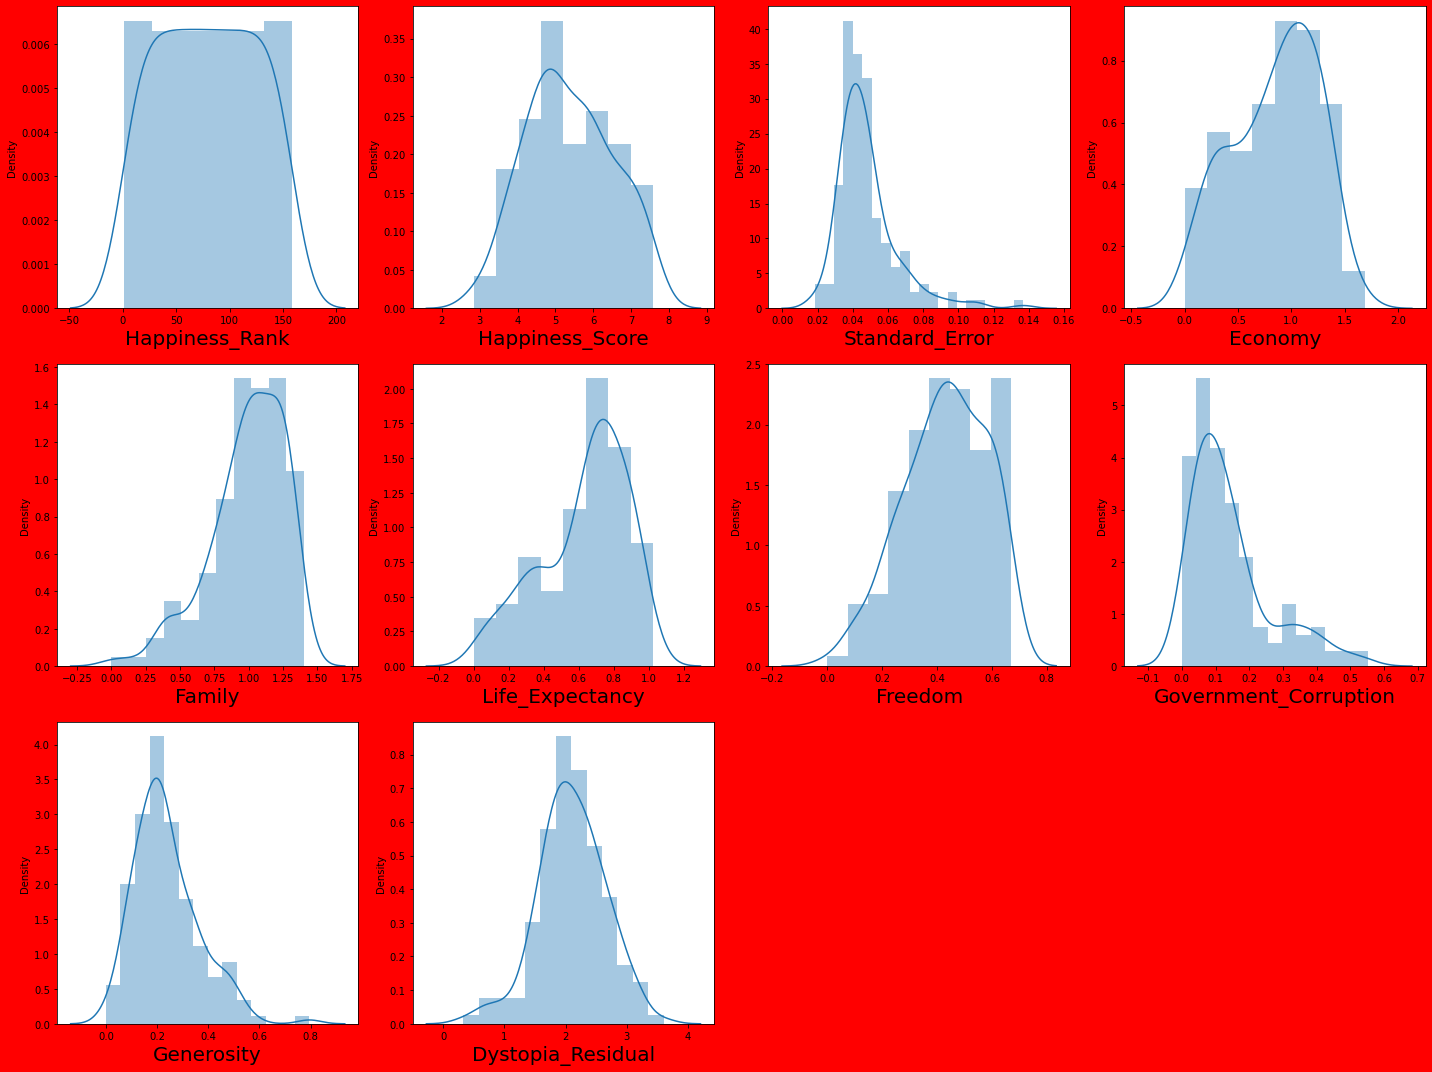

In [27]:
#now the data looks good and there is no missing valuues so we can start visualizing the type of distribution for each feature

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [28]:
df_features=data.drop('Happiness_Score', axis=1)

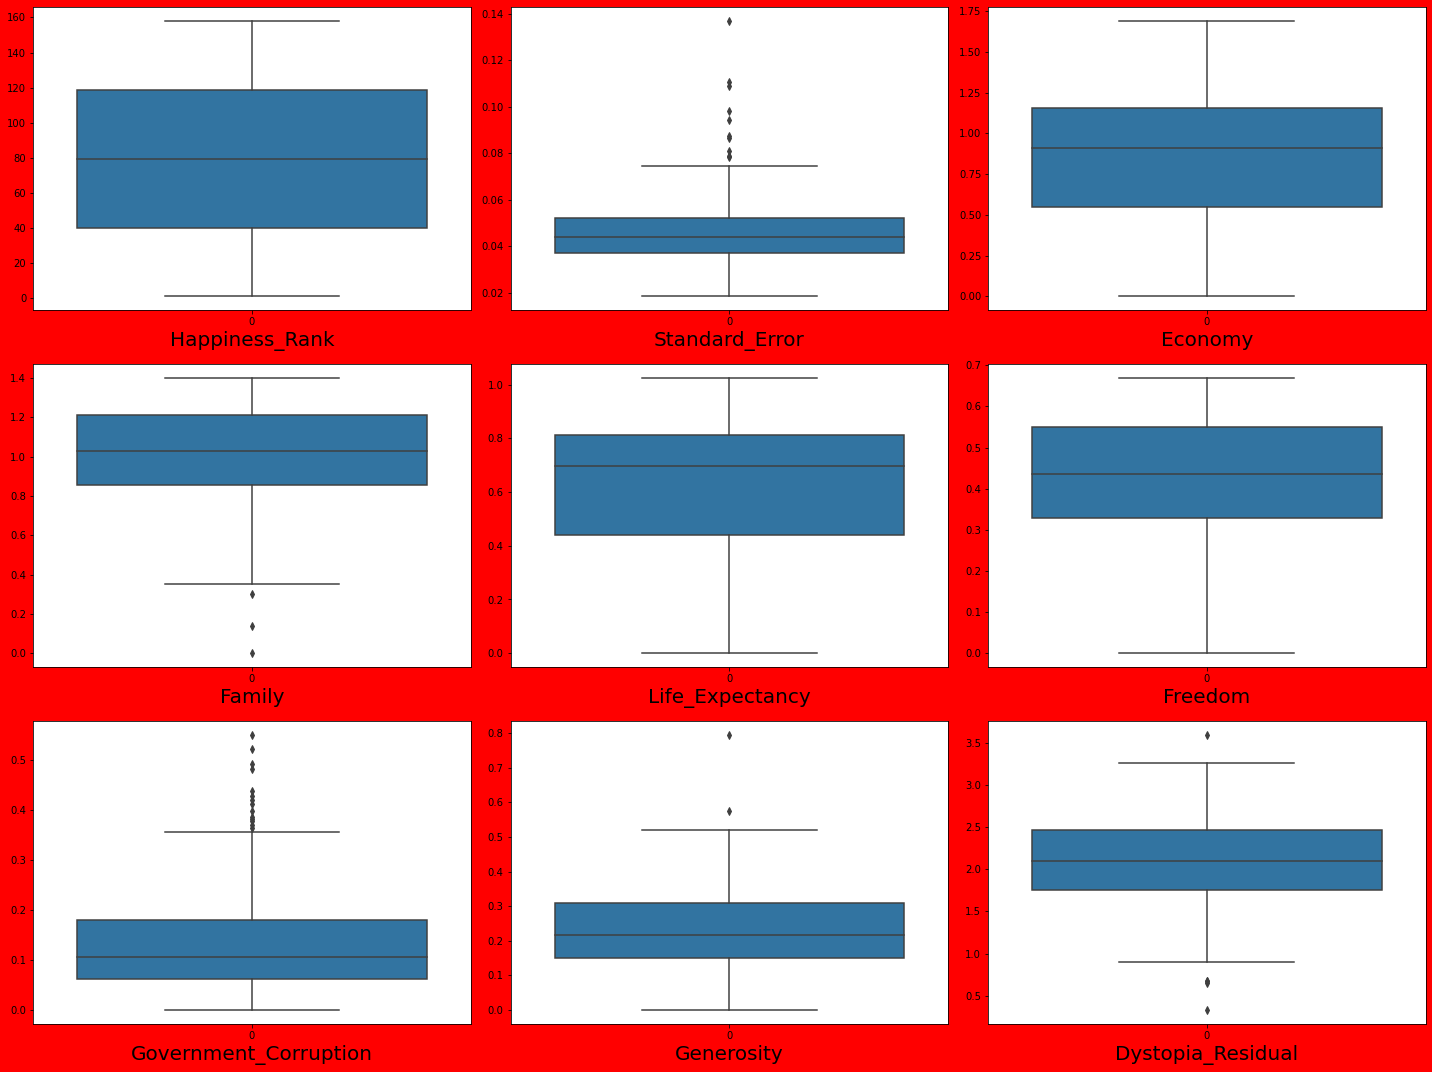

In [29]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [30]:
data.shape

(158, 10)

In [31]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

Happiness_Rank           78.500000
Happiness_Score           1.717750
Standard_Error            0.015032
Economy                   0.612640
Family                    0.357582
Life_Expectancy           0.371828
Freedom                   0.220762
Government_Corruption     0.118580
Generosity                0.159330
Dystopia_Residual         0.703005
dtype: float64

In [32]:
#removing the outliers for standard error
std_high=q3.Standard_Error + (1.5 * iqr.Standard_Error)


index=np.where(data['Standard_Error'] > std_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(148, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
143,152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
144,153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
145,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
146,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [33]:
#removing the outliers for Government_Corruption
gc_high=q3.Government_Corruption + (1.5 * iqr.Government_Corruption)


index=np.where(data['Government_Corruption'] > gc_high )

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(134, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
129,151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
130,152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
131,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
132,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [34]:
#removing the outliers for Generosity
gen_high=q3.Generosity + (1.5 * iqr.Generosity)


index=np.where(data['Generosity'] > gen_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(132, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
127,151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
128,152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
129,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
130,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [35]:
#removing the outliers for Dystopia_Residual
dr_high=q3.Dystopia_Residual + (1.5 * iqr.Dystopia_Residual)


index=np.where(data['Dystopia_Residual'] > dr_high)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(131, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
126,151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
127,152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
128,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
129,155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [36]:
#removing the outliers for Family
family_low=q1.Family - (1.5 * iqr.Family)


index=np.where(data['Family'] < family_low)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(128, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
123,149,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
124,150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
125,151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
126,154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [37]:
#removing the outliers for Dystopia_Residual
dr_low=q1.Dystopia_Residual - (1.5 * iqr.Dystopia_Residual)


index=np.where(data['Dystopia_Residual'] < dr_low)

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

(126, 10)


,index,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...,...
121,148,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
122,149,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
123,150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
124,151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


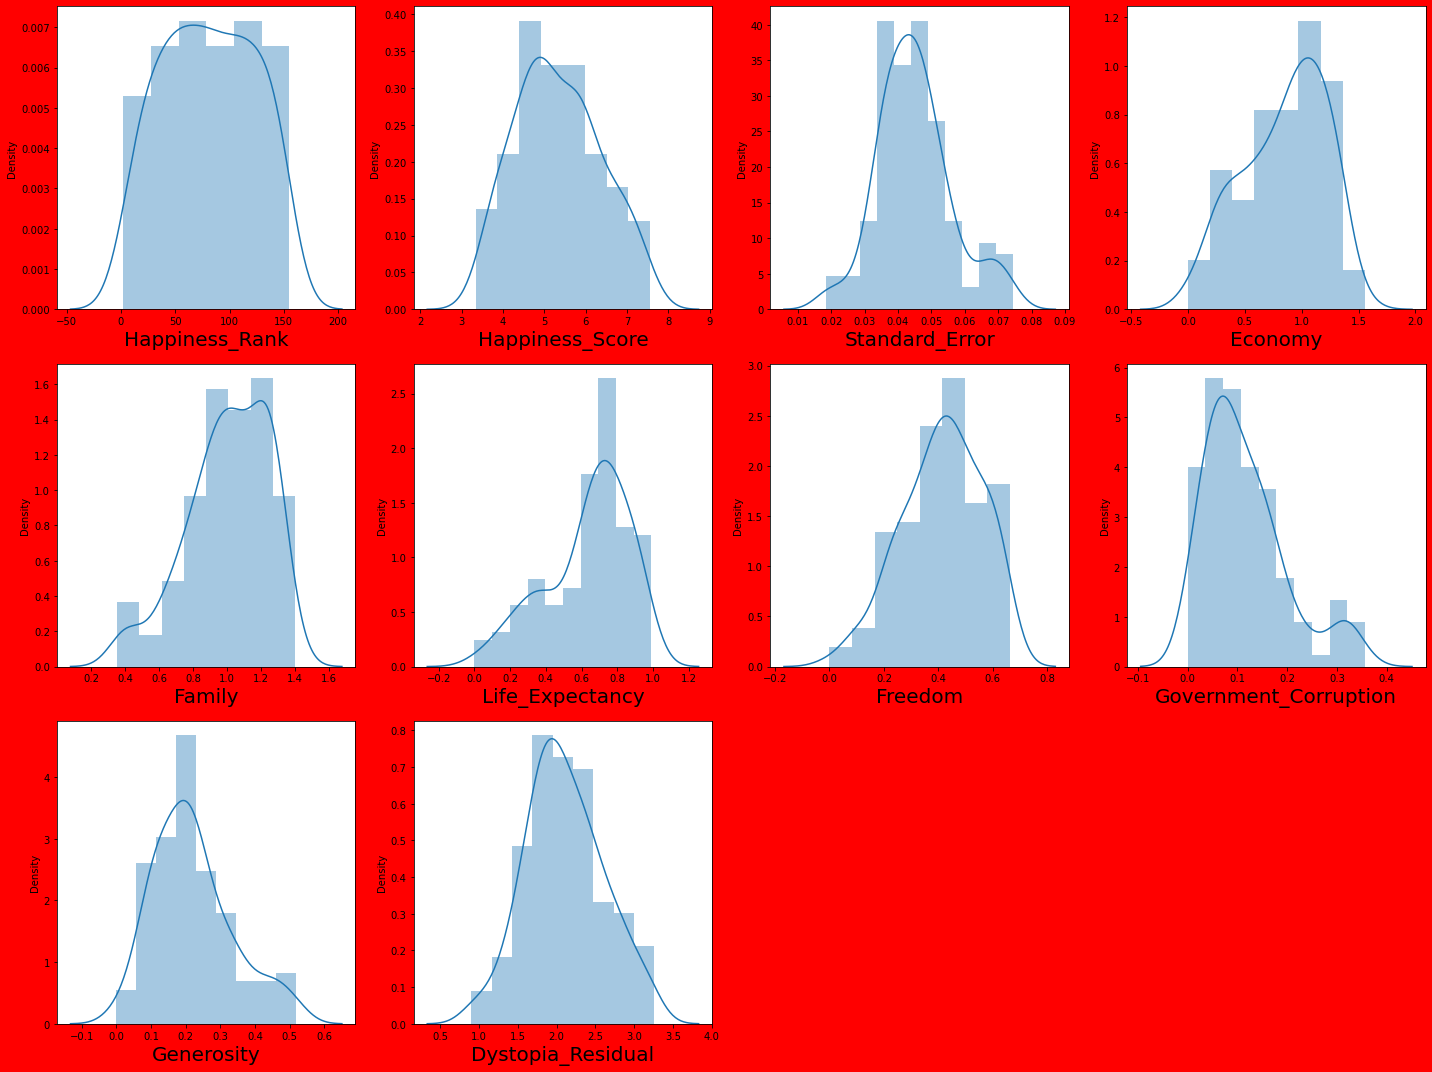

In [38]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [70]:
# the data distribution seems to be good enough and we do not observe any skewness so now lets move on to find the 
# relation between the features and labels

y=data['Happiness_Score']
x=data.drop(columns=['Happiness_Score'])

In [71]:
x

,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...
148,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [72]:
y

1      7.561
4      7.427
6      7.378
9      7.284
10     7.278
       ...  
148    3.667
149    3.656
150    3.655
151    3.587
154    3.340
Name: Happiness_Score, Length: 126, dtype: float64

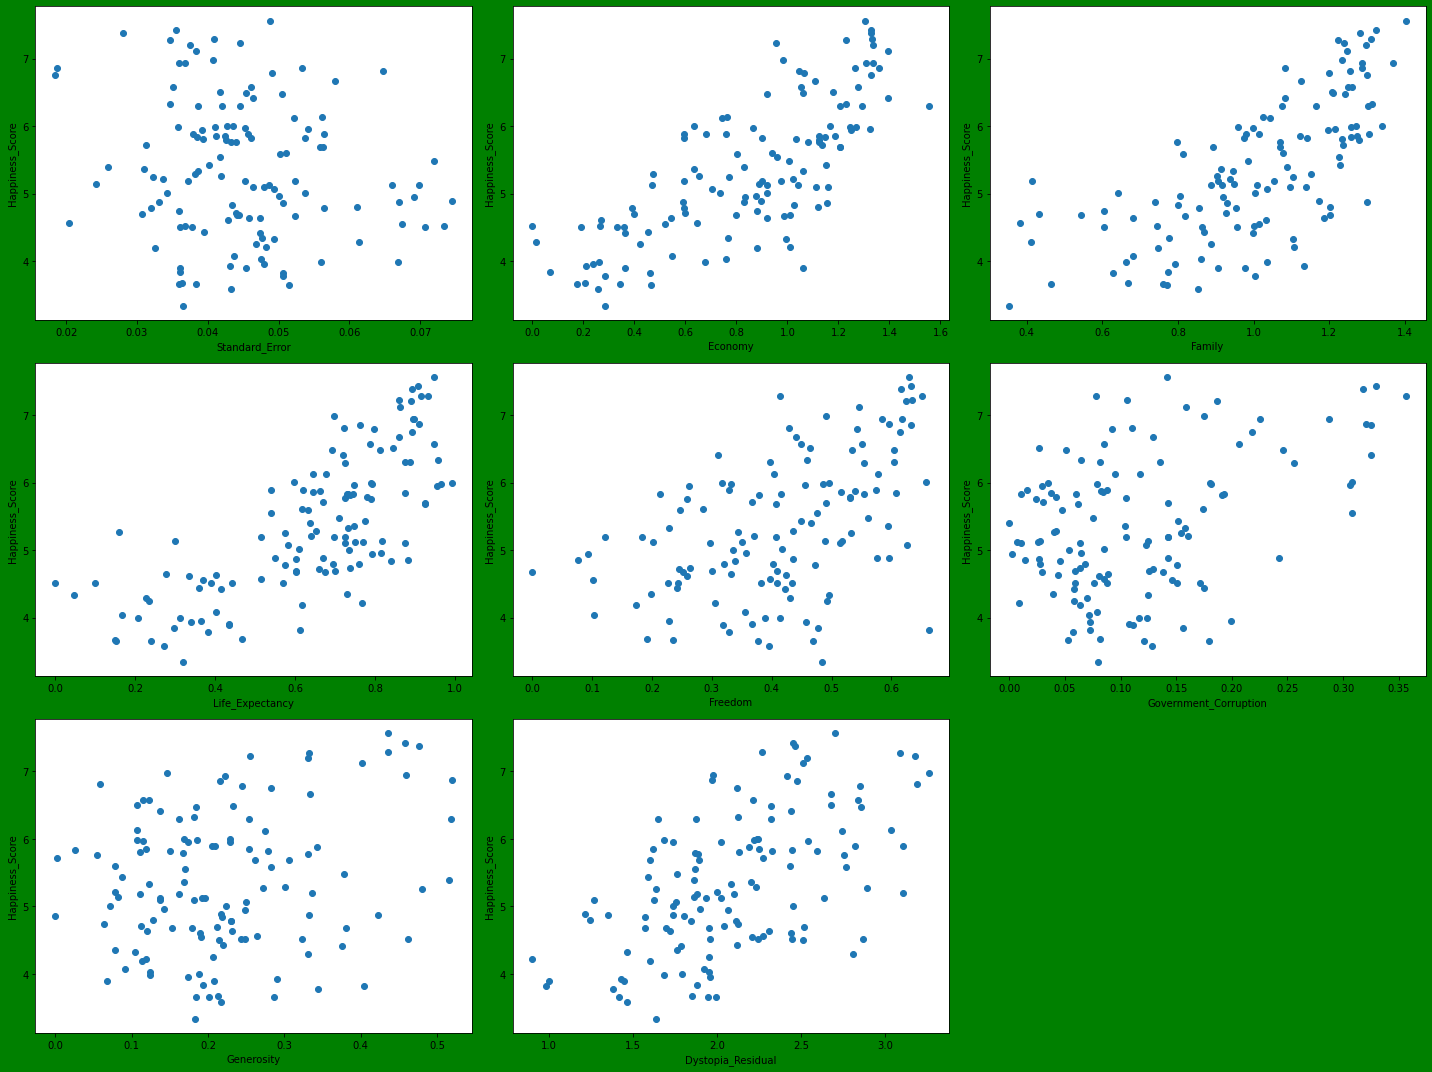

In [73]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Happiness_Score',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
# the relationship  between the labels and feature looks fairly linear except the Happiness Rank, so the linearity assumption is satisfied
#as both the features are in same unit so we are not going to scale the data

# As the dependent variable/ label (Happiness_Score) is a continious data so it is a regression problem and as the features are also
# continious data so we will use linear Regression Model



In [74]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [75]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)
y_train.head()


108    4.694
1      7.561
28     6.575
109    4.686
82     5.192
Name: Happiness_Score, dtype: float64

In [76]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [79]:
#prediction of Happiness_Score
print('Happiness_Score is ', regression.predict(scalar.transform([[0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328]])))

Happiness_Score is  [-6.86562385]


In [80]:
#how well the model fits the training data
regression.score(x_train, y_train)

0.9999999265824265

In [81]:
#lets check how well the model fits the testing data
regression.score(x_test, y_test)

0.9999999224910279